In [66]:
import math

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('/Users/fernandovieira/Library/CloudStorage/OneDrive-Pessoal/1. Educacao/INFO E ESTAT/BASES DE DADOS/BD_ML-e-DS-com-Python-de-A-a-Z/house_prices.csv')

In [10]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [11]:
df.drop(labels=['id', 'date'], axis=1, inplace=True)

In [12]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


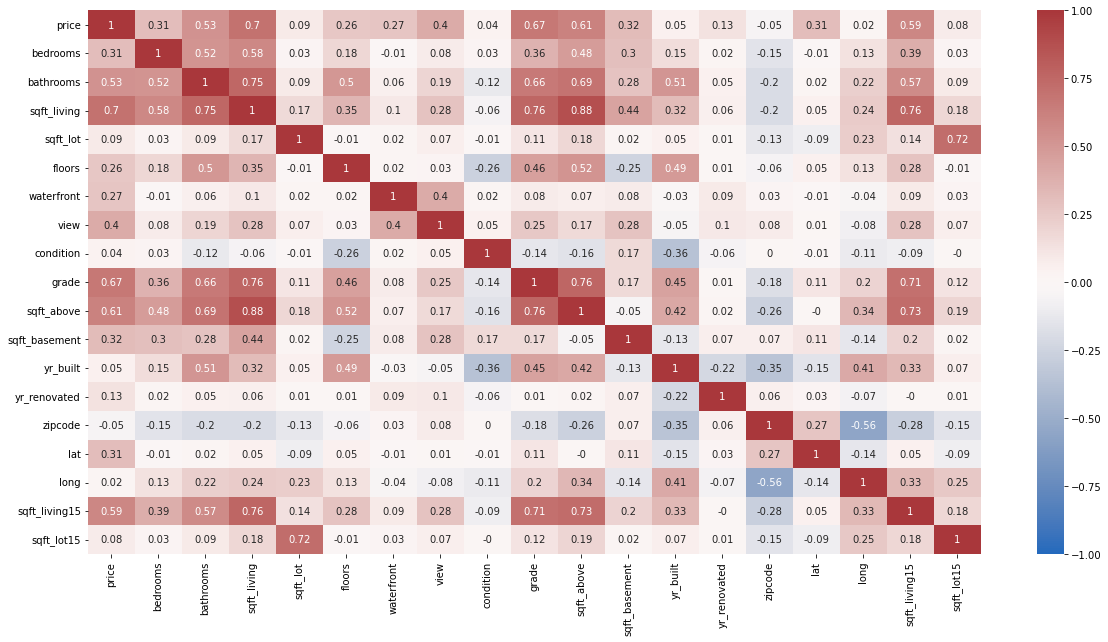

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))
matriz = df.corr().round(2)
ax = sns.heatmap(matriz, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

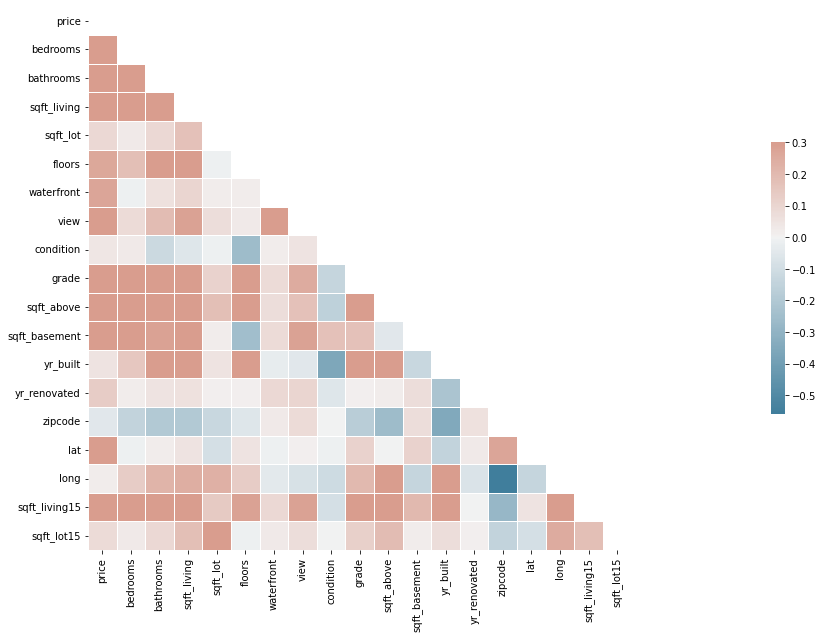

In [41]:
fig, ax = plt.subplots(figsize=(50, 10))
matriz = df.corr().round(2)
mascara = np.triu(np.ones_like(matriz, dtype=bool))
ax = sns.heatmap(matriz, mask=mascara, cmap=sns.diverging_palette(230, 20, as_cmap=True), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Regressão linear simples

In [42]:
x = df['sqft_living'].values
x.shape

(21613,)

In [43]:
x = x.reshape(-1, 1)
x.shape

(21613, 1)

In [44]:
y = df['price'].values
y.shape

(21613,)

In [46]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.2, random_state=1)
x_treinamento.shape, x_teste.shape

((17290, 1), (4323, 1))

In [47]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_treinamento, y_treinamento)

LinearRegression()

In [51]:
lm.intercept_

-30186.361061055562

In [52]:
lm.coef_

array([273.82181112])

In [53]:
lm.intercept_ + lm.coef_ * 770 # 770 sqft_living

array([180656.43350266])

In [55]:
lm.predict([[700]])

array([161488.90672414])

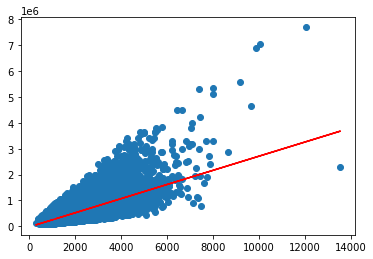

In [57]:
plt.scatter(x, y)
plt.plot(x, lm.predict(x), color='red')

In [58]:
#R2
lm.score(x_treinamento, y_treinamento)

0.48876078213887486

In [59]:
lm.score(x_teste, y_teste)

0.5033019006466928

In [60]:
previsoes = lm.predict(x_teste)
previsoes, y_teste

(array([ 733776.4919685 ,  416143.19106732,  618771.33129738, ...,
         449001.80840193, 1412854.58355033,  380546.3556215 ]),
 array([ 459000.,  445000., 1057000., ...,  260000., 1795000.,  418000.]))

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
mean_absolute_error(y_teste, previsoes)

178578.01159005205

In [64]:
mean_squared_error(y_teste, previsoes)

42865287138.08239

In [67]:
math.sqrt(mean_squared_error(y_teste, previsoes))

292797.83857836924

Regressão linear múltipla

In [71]:
x = df.iloc[:, [2, 3, 9, 10]].values
y = df.iloc[:, 0].values

In [72]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.2, random_state=1)
x_treinamento.shape, x_teste.shape

((17290, 4), (4323, 4))

In [73]:
lm = LinearRegression()
lm.fit(x_treinamento, y_treinamento)

LinearRegression()

In [76]:
lm.score(x_treinamento, y_treinamento)

0.5429158715490658

In [77]:
lm.score(x_teste, y_teste)

0.5433655885394342

In [78]:
previsoes = lm.predict(x_teste)
previsoes, y_teste

(array([ 767214.78818336,  384435.01287134,  973843.30037746, ...,
         524186.77329123, 1374550.60270934,  357590.85134899]),
 array([ 459000.,  445000., 1057000., ...,  260000., 1795000.,  418000.]))

In [79]:
mean_absolute_error(y_teste, previsoes)

163331.28566448094

In [80]:
mean_squared_error(y_teste, previsoes)

78815542841.29994

In [81]:
math.sqrt(mean_squared_error(y_teste, previsoes))

280741.0601271213

In [ ]:
# IMPORTANTE: a regressão linear pressupõe que os dados estejam normalmente distribuídos. Se não tiver: 1) investigar; 2) transformar.

Seleção de atributos

In [ ]:
# Selecionando todas as colunas

In [84]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [86]:
df.drop(labels=['sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

In [87]:
x = df.iloc[:, 1:17].values
y = df.iloc[:, 0].values

In [88]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.2, random_state=1)
x_treinamento.shape, x_teste.shape

((17290, 16), (4323, 16))

In [89]:
lm = LinearRegression()
lm.fit(x_treinamento, y_treinamento)

LinearRegression()

In [90]:
lm.score(x_treinamento, y_treinamento)

0.7028464225751407

In [91]:
lm.score(x_teste, y_teste)

0.6849876187393027

In [ ]:
# Aplicando o algoritmo de selecao das colunas

In [92]:
from sklearn.feature_selection import SelectFdr, f_regression

In [95]:
selecao = SelectFdr(f_regression, alpha=0.00) # alpha: probabilidade de rejeitar H0
x_novo = selecao.fit_transform(x, y)
x.shape, x_novo.shape

((21613, 16), (21613, 9))

In [96]:
selecao.pvalues_

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 7.97250451e-040,
       1.58101007e-322, 0.00000000e+000, 0.00000000e+000, 8.93565406e-008,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.92987281e-015,
       1.02134789e-077, 5.01105043e-015, 0.00000000e+000, 1.47509222e-003])

In [98]:
colunas_selecionadas = selecao.get_support()
colunas_selecionadas

array([ True,  True,  True, False, False,  True,  True, False,  True,
        True,  True, False, False, False,  True, False])

In [99]:
df.columns[1:17][colunas_selecionadas==True]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat'],
      dtype='object')

In [102]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x_novo, y, test_size=0.2, random_state=1)
x_treinamento.shape, x_teste.shape

((17290, 9), (4323, 9))

In [103]:
lm = LinearRegression()
lm.fit(x_treinamento, y_treinamento)

LinearRegression()

In [104]:
lm.score(x_treinamento, y_treinamento)

0.6599629539074899

In [105]:
lm.score(x_teste, y_teste)

0.6437334968000139